# Calculando o $\mathcal{R}_0$ para o Modelo SEIAHR
Neste notebook vamos aprender a como utilizar o método da matriz de próxima geração para calcular o $\mathcal{R}_0$.
## SEIAR Model for COVID-19

Neste notebook está implementado um modelo SEIAR com quarentena implícita. Que inclui também assintomáticos e hospitalizações. Veja o Suplemento 2 para maiores detalhes sobre este modelo.

Seja $\lambda=\beta(I+A)$ a força de infeção da doença.

\begin{align}
\frac{dS}{dt}&=-\lambda (1-\chi) S\\
\frac{dE}{dt}&= \lambda (1-\chi) S-\alpha E\\
\frac{dI}{dt}&= (1-p)\alpha E - \delta I\\
\frac{dA}{dt}&= p\alpha E - \delta A\\
\frac{dH}{dt}&= \phi \delta I -(\rho+\mu) H\\
\frac{dR}{dt}&= (1-\phi)\delta I + \rho H+\delta A
\end{align}

onde $\chi$ é a fração dos suscetíveis em quarentena (distanciamento social)

In [6]:
# import sympy

In [1]:
%display typeset

In [2]:
var('S E I A H Lambda beta chi alpha p phi delta rho mu')

(S, E, I, A, H, Lambda, beta, chi, alpha, p, phi, delta, rho, mu)

Para esta análise podemos ignorar o compartimento dos Recuperados pois é desacoplado da dinâmica.

In [3]:
Lambda = beta*(I+A)
dsdt = -Lambda*(1-chi)*S
dedt = Lambda*(1-chi)*S - alpha*E
didt = (1-p)*alpha*E -delta*I
dadt = p*alpha*E - delta*A
dhdt = phi*delta*I-(rho+mu)*H

## Equilibrios
Naturalmente para este sistema só conseguimos achar o equilíbrio livre-de-doença.

In [27]:
solve([dsdt,dedt,didt,dadt,dhdt],[S,E,I,A,H])

[[S == r2, E == 0, I == 0, A == 0, H == 0]]

## Matriz Jacobiana

In [11]:
jack=jacobian([dsdt,dedt,didt,dadt,dhdt],[S,E,I,A,H])
jack

[ (A + I)*beta*(chi - 1)                       0        S*beta*(chi - 1)        S*beta*(chi - 1)                       0]
[-(A + I)*beta*(chi - 1)                  -alpha       -S*beta*(chi - 1)       -S*beta*(chi - 1)                       0]
[                      0          -alpha*(p - 1)                  -delta                       0                       0]
[                      0                 alpha*p                       0                  -delta                       0]
[                      0                       0               delta*phi                       0               -mu - rho]

In [12]:
cp = jack.characteristic_polynomial()
cp

x^5 + (-A*beta*chi - I*beta*chi + A*beta + I*beta + alpha + 2*delta + mu + rho)*x^4 + (-A*alpha*beta*chi - I*alpha*beta*chi + S*alpha*beta*chi - 2*A*beta*chi*delta - 2*I*beta*chi*delta - A*beta*chi*mu - I*beta*chi*mu - A*beta*chi*rho - I*beta*chi*rho + A*alpha*beta + I*alpha*beta - S*alpha*beta + 2*A*beta*delta + 2*I*beta*delta + A*beta*mu + I*beta*mu + A*beta*rho + I*beta*rho + 2*alpha*delta + delta^2 + alpha*mu + 2*delta*mu + alpha*rho + 2*delta*rho)*x^3 + (-2*A*alpha*beta*chi*delta - 2*I*alpha*beta*chi*delta + S*alpha*beta*chi*delta - A*beta*chi*delta^2 - I*beta*chi*delta^2 - A*alpha*beta*chi*mu - I*alpha*beta*chi*mu + S*alpha*beta*chi*mu - 2*A*beta*chi*delta*mu - 2*I*beta*chi*delta*mu - A*alpha*beta*chi*rho - I*alpha*beta*chi*rho + S*alpha*beta*chi*rho - 2*A*beta*chi*delta*rho - 2*I*beta*chi*delta*rho + 2*A*alpha*beta*delta + 2*I*alpha*beta*delta - S*alpha*beta*delta + A*beta*delta^2 + I*beta*delta^2 + A*alpha*beta*mu + I*alpha*beta*mu - S*alpha*beta*mu + 2*A*beta*delta*mu + 2*I*beta*delta*mu + A*alpha*beta*rho + I*alpha*beta*rho - S*alpha*beta*rho + 2*A*beta*delta*rho + 2*I*beta*delta*rho + alpha*delta^2 + 2*alpha*delta*mu + delta^2*mu + 2*alpha*delta*rho + delta^2*rho)*x^2 + (-A*alpha*beta*chi*delta^2 - I*alpha*beta*chi*delta^2 - 2*A*alpha*beta*chi*delta*mu - 2*I*alpha*beta*chi*delta*mu + S*alpha*beta*chi*delta*mu - A*beta*chi*delta^2*mu - I*beta*chi*delta^2*mu - 2*A*alpha*beta*chi*delta*rho - 2*I*alpha*beta*chi*delta*rho + S*alpha*beta*chi*delta*rho - A*beta*chi*delta^2*rho - I*beta*chi*delta^2*rho + A*alpha*beta*delta^2 + I*alpha*beta*delta^2 + 2*A*alpha*beta*delta*mu + 2*I*alpha*beta*delta*mu - S*alpha*beta*delta*mu + A*beta*delta^2*mu + I*beta*delta^2*mu + 2*A*alpha*beta*delta*rho + 2*I*alpha*beta*delta*rho - S*alpha*beta*delta*rho + A*beta*delta^2*rho + I*beta*delta^2*rho + alpha*delta^2*mu + alpha*delta^2*rho)*x - A*alpha*beta*chi*delta^2*mu - I*alpha*beta*chi*delta^2*mu - A*alpha*beta*chi*delta^2*rho - I*alpha*beta*chi*delta^2*rho + A*alpha*beta*delta^2*mu + I*alpha*beta*delta^2*mu + A*alpha*beta*delta^2*rho + I*alpha*beta*delta^2*rho

In [12]:
jack.eigenvalues()

[1/3*A*beta*(chi - 1) + 1/3*I*beta*(chi - 1) + 1/3*(1/2)^(2/3)*(3*S*alpha*beta*(chi - 1) - (A*beta*(chi - 1) + I*beta*(chi - 1) - alpha - delta)^2 - 3*(alpha*beta*(chi - 1) + (chi*delta - delta)*beta)*A - 3*(alpha*beta*(chi - 1) + (chi*delta - delta)*beta)*I + 3*alpha*delta)*(-I*sqrt(3) + 1)/(27*(chi*delta - delta)*A*alpha*beta + 27*(chi*delta - delta)*I*alpha*beta + 2*(A*beta*(chi - 1) + I*beta*(chi - 1) - alpha - delta)^3 - 9*(S*alpha*beta*(chi - 1) - (alpha*beta*(chi - 1) + (chi*delta - delta)*beta)*A - (alpha*beta*(chi - 1) + (chi*delta - delta)*beta)*I + alpha*delta)*(A*beta*(chi - 1) + I*beta*(chi - 1) - alpha - delta) + 9*sqrt(-1/3*(A^4 + 4*A^3*I + 6*A^2*I^2 + 4*A*I^3 + I^4 + (A^2 + 2*A*I + I^2)*S^2 - 2*(A^3 + 3*A^2*I + 3*A*I^2 + I^3)*S)*alpha^2*beta^4*chi^4 - 1/3*(A^2 + 2*A*I + I^2 - 2*(A + I)*S + S^2)*alpha^4*beta^2 + 2/3*(A^3 + 3*A^2*I + 3*A*I^2 + I^3 + 5*(A + I)*S^2 - 2*S^3 - 4*(A^2 + 2*A*I + I^2)*S)*alpha^3*beta^3 - 1/3*(A^4 + 4*A^3*I + 6*A^2*I^2 + 4*A*I^3 + I^4 + (A^2 + 2*A*I + I^2)*S^2 - 2*(A^3 + 3*A^2*I + 3*A*I^2 + I^3)*S)*alpha^2*beta^4 - 1/3*((A^2 + 2*A*I + I^2)*beta^2*chi^2 - 2*(A + I)*alpha*beta + (A^2 + 2*A*I + I^2)*beta^2 + alpha^2 + 2*((A + I)*alpha*beta - (A^2 + 2*A*I + I^2)*beta^2)*chi)*delta^4 - 2/3*((A^3 + 3*A^2*I + 3*A*I^2 + I^3 + 5*(A + I)*S^2 - 2*S^3 - 4*(A^2 + 2*A*I + I^2)*S)*alpha^3*beta^3 - 2*(A^4 + 4*A^3*I + 6*A^2*I^2 + 4*A*I^3 + I^4 + (A^2 + 2*A*I + I^2)*S^2 - 2*(A^3 + 3*A^2*I + 3*A*I^2 + I^3)*S)*alpha^2*beta^4)*chi^3 - 2/3*((A^3 + 3*A^2*I + 3*A*I^2 + I^3)*beta^3*chi^3 + (A + I - S)*alpha^2*beta + (A^2 + 2*A*I + I^2 - (A + I)*S)*alpha*beta^2 - (A^3 + 3*A^2*I + 3*A*I^2 + I^3)*beta^3 - alpha^3 + ((A^2 + 2*A*I + I^2 - (A + I)*S)*alpha*beta^2 - 3*(A^3 + 3*A^2*I + 3*A*I^2 + I^3)*beta^3)*chi^2 - ((A + I - S)*alpha^2*beta + 2*(A^2 + 2*A*I + I^2 - (A + I)*S)*alpha*beta^2 - 3*(A^3 + 3*A^2*I + 3*A*I^2 + I^3)*beta^3)*chi)*delta^3 - 1/3*((A^2 + 2*A*I + I^2 - 2*(A + I)*S + S^2)*alpha^4*beta^2 - 6*(A^3 + 3*A^2*I + 3*A*I^2 + I^3 + 5*(A + I)*S^2 - 2*S^3 - 4*(A^2 + 2*A*I + I^2)*S)*alpha^3*beta^3 + 6*(A^4 + 4*A^3*I + 6*A^2*I^2 + 4*A*I^3 + I^4 + (A^2 + 2*A*I + I^2)*S^2 - 2*(A^3 + 3*A^2*I + 3*A*I^2 + I^3)*S)*alpha^2*beta^4)*chi^2 - 1/3*((A^4 + 4*A^3*I + 6*A^2*I^2 + 4*A*I^3 + I^4)*beta^4*chi^4 + 2*(A + I + 4*S)*alpha^3*beta - (6*A^2 + 12*A*I + 6*I^2 + 4*(A + I)*S - S^2)*alpha^2*beta^2 + 2*(A^3 + 3*A^2*I + 3*A*I^2 + I^3 + 4*(A^2 + 2*A*I + I^2)*S)*alpha*beta^3 + (A^4 + 4*A^3*I + 6*A^2*I^2 + 4*A*I^3 + I^4)*beta^4 + alpha^4 - 2*((A^3 + 3*A^2*I + 3*A*I^2 + I^3 + 4*(A^2 + 2*A*I + I^2)*S)*alpha*beta^3 + 2*(A^4 + 4*A^3*I + 6*A^2*I^2 + 4*A*I^3 + I^4)*beta^4)*chi^3 - ((6*A^2 + 12*A*I + 6*I^2 + 4*(A + I)*S - S^2)*alpha^2*beta^2 - 6*(A^3 + 3*A^2*I + 3*A*I^2 + I^3 + 4*(A^2 + 2*A*I + I^2)*S)*alpha*beta^3 - 6*(A^4 + 4*A^3*I + 6*A^2*I^2 + 4*A*I^3 + I^4)*beta^4)*chi^2 - 2*((A + I + 4*S)*alpha^3*beta - (6*A^2 + 12*A*I + 6*I^2 + 4*(A + I)*S - S^2)*alpha^2*beta^2 + 3*(A^3 + 3*A^2*I + 3*A*I^2 + I^3 + 4*(A^2 + 2*A*I + I^2)*S)*alpha*beta^3 + 2*(A^4 + 4*A^3*I + 6*A^2*I^2 + 4*A*I^3 + I^4)*beta^4)*chi)*delta^2 + 2/3*((A^2 + 2*A*I + I^2 - 2*(A + I)*S + S^2)*alpha^4*beta^2 - 3*(A^3 + 3*A^2*I + 3*A*I^2 + I^3 + 5*(A + I)*S^2 - 2*S^3 - 4*(A^2 + 2*A*I + I^2)*S)*alpha^3*beta^3 + 2*(A^4 + 4*A^3*I + 6*A^2*I^2 + 4*A*I^3 + I^4 + (A^2 + 2*A*I + I^2)*S^2 - 2*(A^3 + 3*A^2*I + 3*A*I^2 + I^3)*S)*alpha^2*beta^4)*chi + 2/3*((A^4 + 4*A^3*I + 6*A^2*I^2 + 4*A*I^3 + I^4 + (A^3 + 3*A^2*I + 3*A*I^2 + I^3)*S)*alpha*beta^4*chi^4 + (A + I + S)*alpha^4*beta - (A^2 + 2*A*I + I^2 - 2*(A + I)*S - 5*S^2)*alpha^3*beta^2 - (A^3 + 3*A^2*I + 3*A*I^2 + I^3 - 5*(A + I)*S^2 - 2*(A^2 + 2*A*I + I^2)*S)*alpha^2*beta^3 + (A^4 + 4*A^3*I + 6*A^2*I^2 + 4*A*I^3 + I^4 + (A^3 + 3*A^2*I + 3*A*I^2 + I^3)*S)*alpha*beta^4 + ((A^3 + 3*A^2*I + 3*A*I^2 + I^3 - 5*(A + I)*S^2 - 2*(A^2 + 2*A*I + I^2)*S)*alpha^2*beta^3 - 4*(A^4 + 4*A^3*I + 6*A^2*I^2 + 4*A*I^3 + I^4 + (A^3 + 3*A^2*I + 3*A*I^2 + I^3)*S)*alpha*beta^4)*chi^3 - ((A^2 + 2*A*I + I^2 - 2*(A + I)*S - 5*S^2)*alpha^3*beta^2 + 3*(A^3 + 3*A^2*I

## Calculo do $\mathcal{R}_0$
O método que iremos utilizar foi proposto por P. van den Driessche no seguinte artigo: 

[Reproduction numbers and sub-threshold endemic equilibria for compartmental models of disease transmission](https://pdfs.semanticscholar.org/3cf7/1968a86800215b4e129ec3eda67520832cf0.pdf)



 Seja $X=(x_1,\ldots, x_n)^t$, tal que $x_i\geq 0$, o número de indivíduos em cada compartimento.

Vamos definir $X_s$ como o conjunto de todos os estados livres de doença.

$$X_s=\{x \geq 0|x_i=0, i=1\ldots,m\}$$



Supõe-se que cada função é continuamente diferenciável pelo menos duas vezes ($C^2$) em cada variável. As equações são reordenadas para que as $m$ primeiras equação sejam aquelas que contém infectados. Seja ${\cal F}_i(x)$ a taxa de aparecimento de novas infecções no compartimento $i$, ${\cal V}_i^+(x)$ a taxa de entrada de indivíduos no compartimento $i$ por outros meios e ${\cal V}_i^-(x)$ a taxa de saída de indivíduos do compartimento $i$. O modelo de transmissão da doença consiste em condições iniciais não negativas juntamente com o seguinte sistema de equações:

$\dot{x}=f_i(x)={\cal F}_i(x)-{\cal V}_i(x), i=1\ldots, n$

onde, ${\cal V}_i (x) = {\cal V}_i^{-}(x) - {\cal V}_i^+(x)$ e as funções satisfazem os pressupostos  (A1) - (A5) descritos abaixo. Desde que cada função representa uma transferência dirigida de indivíduos, todos elas são não-negativos.

(A1) Se $x \geq 0 $, então ${\cal F}_i, {\cal V}_i^+, {\cal V}_i ^- \geq 0$ para $i=1, \ldots, n$

ou seja, se um compartimento estiver vazio, não pode haver saída de indivíduos deste, por morte, infecção ou qualquer outro meio.

(A2) Se $x_i=0$ então ${\cal V}_i^-(x)=0$. Em particular, se $x \in X_s$, então ${\cal V}_i^-(x)=0$ para $i=1,\ldots, m$

(A3) ${\cal F}_i=0$ se $i>m$

(A4) Se $x \in X_S$, então ${\cal F}_i(x) = 0$ e ${\cal V}_i^+(x)=0$ para $i=1,\ldots, m$

(A5) Se ${\cal F}(x)$ é um vetor nulo, então todos os autovalores de $Df(x_0)$ tem parte real negativa.

 ---

Para calcular o $R_0$ é importante distinguir as novas infecções de todas as outras mudanças na população. No modelo proposto, os compartimentos que correspondem aos indivíduos infectados são $E$, $I$ e $A$, portanto, ${\bf m=3}$. A fim de clareza, vamos ordenar os $n=5$ compartimentos da seguinte forma: $[E, I, A, H, S]$, separando os $m$ primeiros compartimentos do restante. Vale ressaltar que as transferências dos compartimentos expostos para os infectados e Assintomáticos e de infectados para Hospitalizados não são consideradas novas infecções, mas sim a progressão de um indivíduo infectado através dos vários compartimentos. Portanto,

$$ {\cal F}_i(x): \text{ taxa de surgimento de novos infectados no compartimento } i $$


$$ {\cal F} =\begin{bmatrix}
\Lambda(1-\chi) S\\
0\\
0\\
\end{bmatrix} $$


Onde, ${\color{red}\Lambda=\beta(I+A)}$.

In [4]:
F_cal = matrix([[Lambda*(1-chi)*S],[0],[0]])
F_cal

[-(A + I)*S*beta*(chi - 1)]
[                        0]
[                        0]



Além disso, temos

$$ {\cal V}_i(x)^-: \text{ taxa de saída do compartimento } i $$

$$ {\cal V}_i(x)^+: \text{ taxa de entrada do compartimento } i $$

Logo,

$$
\begin{equation}
{\cal V^-} = \begin{bmatrix}
\alpha E\\
\delta I\\
\delta A
\end{bmatrix}
\end{equation}
$$
$$
\begin{equation}
\qquad {\cal V^+} = \begin{bmatrix}
0\\
(1-p) \alpha E\\
p \alpha E\\
\end{bmatrix}
\end{equation}
$$

In [5]:
V_cal_neg = matrix([[alpha*E],[delta*I],[delta*A]])
V_cal_neg

[E*alpha]
[I*delta]
[A*delta]

In [6]:
V_cal_pos = matrix([[0],[(1-p)*alpha*E],[p*alpha*E]])
V_cal_pos

[               0]
[-E*alpha*(p - 1)]
[       E*alpha*p]



$${\cal V}_i (x) = {\cal V}_i(x)^{-} - {\cal V}_i(x)^+$$

Então,
\begin{equation}
{\cal V} =
\begin{bmatrix}
\alpha E\\
(p-1)\alpha E+\delta I\\
-p\alpha E+ \delta A\\
\end{bmatrix}
\end{equation}

In [7]:
V_cal = V_cal_neg-V_cal_pos
V_cal

[                  E*alpha]
[E*alpha*(p - 1) + I*delta]
[     -E*alpha*p + A*delta]

Definimos também $F=\left[\frac{\partial {\cal F}_i (x_0)}{\partial x_j}\right]$ e $V=\left[\frac{\partial {\cal V}_i (x_0) }{\partial x_j}\right]$, onde $x_0$ é um DFE (Equilíbrio livre de doença) e $1\leq i,j \leq m$. 

Isto equivale à jacobiana  destas duas matrizes, após substituir $x_0$ ou seja, $S=1$.

In [8]:
F = jacobian(F_cal(S=1),[E,I,A])
F

[              0 -beta*(chi - 1) -beta*(chi - 1)]
[              0               0               0]
[              0               0               0]

In [9]:
V = jacobian(V_cal(S=1),[E,I,A])
V

[        alpha             0             0]
[alpha*(p - 1)         delta             0]
[     -alpha*p             0         delta]

${\cal R}_0 = \rho (FV^{-1})$

In [10]:
M = F*V.inverse()

In [11]:
M=M.simplify_full()
M

[-(beta*chi - beta)/delta -(beta*chi - beta)/delta -(beta*chi - beta)/delta]
[                       0                        0                        0]
[                       0                        0                        0]

Since only the first row of $M$ is non-zero, all but one of the eigenvalues is $0$ and the dominant eigenvalue or spectral radius is $M_{11}$, thus

In [12]:
M.eigenvalues()

[-(beta*chi - beta)/delta, 0, 0]

In [13]:
R0=M[0,0].simplify_full()
R0

-(beta*chi - beta)/delta

In [28]:
R0.variables()

(beta, chi, delta)

In [40]:
Ft = jacobian(F_cal,[E,I,A])
Vt = jacobian(V_cal,[E,I,A])
Mt = Ft*Vt.inverse()
show(pretty_print(html('$R_t=$')))
Rt = Mt[0,0]
Rt

<script type="math/tex">R_t=</script>

None

S*beta*(chi - 1)*(p - 1)/delta - S*beta*(chi - 1)*p/delta

In [ ]:
print(Rt)

In [ ]:
R0(chi=0.1,phi=.1,rho=.6,delta=.1,alpha=10, p=.75,beta=.5)

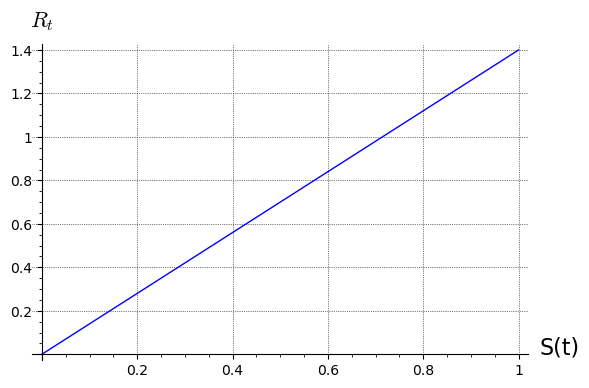

In [50]:
P = plot(Rt(chi=0.3,phi=.1,rho=.6,delta=.1,alpha=10,beta=.2, p=.75),(S,0,1))
P.show(axes_labels=['S(t)','$R_t$'], gridlines=True)

In [51]:
1/1.4

0.714285714285714